Summary of Observations:
1. Salary Range vs Frequency histogram: 
    
    a. Most of the employees in the company fall into the lowest salary range, i.e. $ 40,000-50,000 annually.
    
    b. As the salary range increases, the number of employees per range decreases.


2. Job Title vs Average Salary Bar graph:
    
    a. Senior Staff and Staff have the highest average salaries of around $ 58.5k.
    
    b. Manager comes in 3rd with an average salary of $ 51.5k.
    
    c. The average salary of the rest of the job titles are similar averaging around $ 48.5k.


In [1]:
# Pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# SQL Alchemy
from sqlalchemy import create_engine

In [2]:
# Create Engine for employee db
engine = create_engine('postgresql://localhost:5432/employee_db')
connection = engine.connect()

In [3]:
#Fetch Employee & salary data by joining Employee and Salary tables
emp_salary_data_df = pd.read_sql("SELECT e.emp_no, e.emp_title_id, s.salary FROM employee e JOIN salary s ON e.emp_no = s.emp_no", connection)
                              
emp_salary_data_df.head()    

,emp_no,emp_title_id,salary
0,57444,e0002,48973
1,13616,e0003,40000
2,240129,e0004,43548
3,427958,s0001,63377
4,35916,e0003,40000


In [4]:
#Fetch Title data from Title table
title_data_df = pd.read_sql("SELECT title_id, title FROM title", connection)
                              
title_data_df.head()    

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [5]:
#Merge the emp/salary and Title df
merged_df= pd.merge(emp_salary_data_df, title_data_df 
                   ,left_on="emp_title_id"
                   ,right_on = "title_id"
                   ,how="inner"
                   ,suffixes=["_emp","title"])
merged_df.head()

,emp_no,emp_title_id,salary,title_id,title
0,57444,e0002,48973,e0002,Engineer
1,67799,e0002,48111,e0002,Engineer
2,215615,e0002,40000,e0002,Engineer
3,43471,e0002,40023,e0002,Engineer
4,225842,e0002,40000,e0002,Engineer


In [6]:
#clean the df of null values 

#Replace blanks with nan if present
merged_df['salary'] = merged_df['salary'].replace('', np.nan)
merged_df['title'] = merged_df['title'].replace('', np.nan)

#drop nan
clean_employee_df = merged_df.dropna()

#Perform count of records in each column to verify they are equal
clean_employee_df.count()

emp_no          300024
emp_title_id    300024
salary          300024
title_id        300024
title           300024
dtype: int64

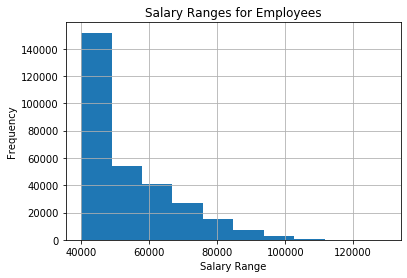

In [7]:
#Create a histogram to visualize the most common salary ranges for employees.

#Plot histogram
clean_employee_df.hist(column='salary')

#set labels
plt.title("Salary Ranges for Employees")
plt.xlabel("Salary Range")
plt.ylabel("Frequency")

plt.show()

Insights from the above graph:

a. Most of the employees in the company fall into the lowest salary range, i.e $40,000-50,000 annually. 

b. As the salary range increases, the number of employees per range decreases.

In [8]:
#Group by Title and find avg salary for each group

#group by title
title_group=clean_employee_df.groupby('title')

#mean of salary for each group
salary_mean=round(title_group['salary'].mean(),2)

#create dataframe with stats
Title_Summary_df=pd.DataFrame({"Mean Salary":salary_mean})

#formatting
Title_Summary_df.style.format("{:,.2f}")

,Mean Salary
title,
Assistant Engineer,"48,564.43"
Engineer,"48,535.34"
Manager,"51,531.04"
Senior Engineer,"48,506.80"
Senior Staff,"58,550.17"
Staff,"58,465.38"
Technique Leader,"48,582.90"


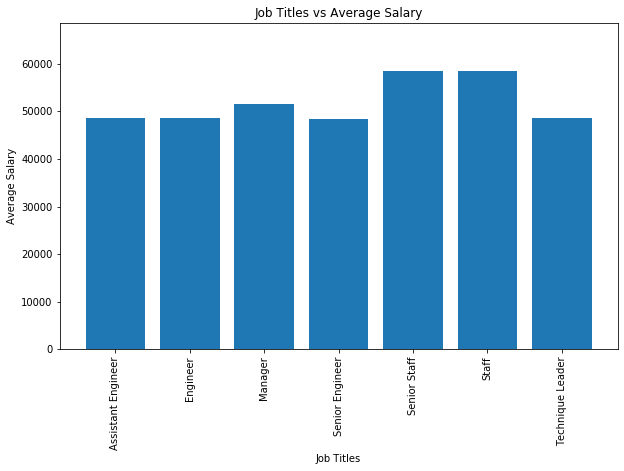

In [9]:
# Generate a bar plot showing the title vs average salary using pyplot.

#reset index
Title_graph_df=Title_Summary_df.reset_index()

#length of count of title
x_axis = np.arange(len(Title_graph_df['title']))

#Set y axis values
y_axis=Title_graph_df['Mean Salary']

#List of titles for x axis tick locations
title_list= Title_graph_df['title'].to_list() 

#plot bar graph using pyplot
f, ax = plt.subplots(figsize=(10,6))
plt.bar(x_axis, y_axis,  align="center" )

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [title for title in title_list],  rotation='vertical')

#set labels
plt.title("Job Titles vs Average Salary")
plt.xlabel("Job Titles")
plt.ylabel("Average Salary")

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(y_axis)+10000)


plt.show()

Insights from the above graph:

a. Senior Staff and Staff have the highest average salaries of around $ 58.5k.

b. Manager comes in 3rd with an average salary of $ 51.5k.

c. The average salary of the rest of the job titles are similar averaging around $ 48.5k.

In [10]:
#close db connection
connection.close()